# Module 3 Project - Pump it Up: Data Mining the Water Table

The goal of this project is to construct a classification model that can be used to predict the condition of water wells in Tanzania. This model will classify the condition of water wells into 3 categories namely - 

- functional - the waterpoint is operational and there are no repairs needed
- functional needs repair - the waterpoint is operational, but needs repairs
- non functional - the waterpoint is not operational

To construct this model, I will use the data from Taarifa and the Tanzanian Ministry of Water. My approach for this project is to follow the OSEMN framework. The steps of this framework is as follow - 

1. Obtain the data
2. Scrub the data
3. Explore the data
4. Model the data
5. Interpret the data

As the first step, I will import the necessary tools to construct the model.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Obtaining Data

The data from Taarifa and the Tanzanian Ministry of Water is originally divided into 3 csv files - 

- Test set values: The independent variables that need predictions

- Training set labels: The dependent variable (status_group) for each of the rows in Training set values

- Training set values: The independent variables for the training set

Since there is no labels for the test dataset, I will primarily use the training dataset to construct the model as well as test the various scores of the model. Then I will use the values of test data to generate predictions.

First, I will use pandas to create the feature dataframe from "Training set value" csv file and inspect the first 5 rows.

In [2]:
features = pd.read_csv('TrainingSetValues.csv', index_col='id')
features.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# checking how many columns are in the dataframe
len(features.columns)

39

Next, I will use pandas to create the target dataframe from "Training Set Labels" csv file and check the first 5 rows.

In [4]:
target = pd.read_csv('TrainingSetLabels.csv', index_col='id')
target.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


Next, we will look at the description of each feature. These descriptions are provided by Taarifa and the Tanzanian Ministry of Water.

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

# Scrubbing Data - Removing Irrelevant Features

By looking at these descriptions, we can realize that some of the features are irrelevant to the development of our model. Therefore, I will remove these features from the data frame. The features I will remove are - 

- date_recorded - The date the row was entered
- funder - Who funded the well
- wpt_name - Name of the waterpoint if there is one
- recorded_by - Group entering this row of data

In [5]:
features = features.drop(columns=['date_recorded', 'funder', 'wpt_name', 'recorded_by'], axis=1)

In [6]:
# checking how many columns are in the dataframe
len(features.columns)

35

The 4 features have been dropped as per the number of columns in the current dataframe.

I also notice that some of the column names are similar. I will now check if these columns have identical values. If they do, we can remove the duplicate columns and consolidate our dataframe. The columns I will investigate are - 

- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
<br>
<br>
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
<br>
<br>
- payment - What the water costs
- payment_type - What the water costs
<br>
<br>
- water_quality - The quality of the water
- quality_group - The quality of the water
<br>
<br>
- quantity - The quantity of water
- quantity_group - The quantity of water
<br>
<br>
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
<br>
<br>
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

First, I will write a function that will provide the number and names of unique values in the columns.

In [7]:
def check_unique(l):
    for i in l:
        print("Feature Name:", i)
        print("Number of Unique Values:", len(features[i].unique()))
        print("Unique Values:", features[i].unique())
        print('\n')

Next, I will check the first set of features with similar names.

In [8]:
columns_1 = ['scheme_management', 'scheme_name', 'management', 'management_group']

check_unique(columns_1)

Feature Name: scheme_management
Number of Unique Values: 13
Unique Values: ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


Feature Name: scheme_name
Number of Unique Values: 2697
Unique Values: ['Roman' nan 'Nyumba ya mungu pipe scheme' ... 'BL Nsherehehe'
 'Magati  gravity spri' 'Mtawanya']


Feature Name: management
Number of Unique Values: 12
Unique Values: ['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']


Feature Name: management_group
Number of Unique Values: 5
Unique Values: ['user-group' 'other' 'commercial' 'parastatal' 'unknown']




"Scheme_management" and "management" features have similar values. However, the former contains 'nan' and 'None' for missing values, and the latter has 'unknown' for the missing values. Therefore, I will drop the "Scheme_management" column and keep "management" column.
<br>
<br>
I will also remove the "scheme_name" column since it has 2697 different categories. Such a high number of unique values will not be useful for our model. "Management_group" will be also removed because its categorical values are included in "management" as sub-categories.

In [9]:
# removing "scheme_management", "scheme_name" and "management_group"

features = features.drop(columns=['scheme_management', 'scheme_name', 'management_group'], axis=1)

# checking the remaining number of columns
len(features.columns)

32

Next, I will check the second set of features.

In [10]:
columns_2 = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

check_unique(columns_2)

Feature Name: extraction_type
Number of Unique Values: 18
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']


Feature Name: extraction_type_group
Number of Unique Values: 13
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']


Feature Name: extraction_type_class
Number of Unique Values: 7
Unique Values: ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']




These 3 features have identical values and "extraction_type_class" seems to have the highest level of category and the other two are sub-categories. Therefore, we can remove "extraction_type" and "extraction_type_group" while keeping "extraction_type_class" to construct our model.

In [11]:
# removing "extraction_type" and "extraction_type_group"

features = features.drop(columns=['extraction_type', 'extraction_type_group'], axis=1)

# checking the remaining number of columns
len(features.columns)

30

Let's look at the next set - 

In [12]:
columns_3 = ['payment', 'payment_type']

check_unique(columns_3)

Feature Name: payment
Number of Unique Values: 7
Unique Values: ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']


Feature Name: payment_type
Number of Unique Values: 7
Unique Values: ['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']




Both features have identical values. So, we will just keep one feature ('payment_type') and remove the other one ('payment').

In [13]:
# removing "payment"

features = features.drop(columns=['payment'], axis=1)

# checking the remaining number of columns
len(features.columns)

29

Now, we move on to the fourth set - 

In [14]:
columns_4 = ['water_quality', 'quality_group']

check_unique(columns_4)

Feature Name: water_quality
Number of Unique Values: 8
Unique Values: ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']


Feature Name: quality_group
Number of Unique Values: 6
Unique Values: ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']




These two features also have similar values. The "water_quality" has two more categories "salty abandoned" and "fluoride abandoned". These "abandoned" statuses might be important for our model. Therefore, we will keep "water_qualtity" and remove "quality_group".

In [15]:
# removing "quality_group"

features = features.drop(columns=['quality_group'], axis=1)

# checking the remaining number of columns
len(features.columns)

28

Next, we will look at "quantity" and "quantity_group" features.

In [16]:
columns_5 = ['quantity', 'quantity_group']

check_unique(columns_5)

Feature Name: quantity
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']


Feature Name: quantity_group
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']




These two features also have similar values. We will keep "quantity" and remove "quantity_group".

In [17]:
# removing "quantity_group"

features = features.drop(columns=['quantity_group'], axis=1)

# checking the remaining number of columns
len(features.columns)

27

Next, we will look at 'source', 'source_type' and 'source_class'. 

In [18]:
columns_6 = ['source', 'source_type', 'source_class']

check_unique(columns_6)

Feature Name: source
Number of Unique Values: 10
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']


Feature Name: source_type
Number of Unique Values: 7
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'borehole' 'other' 'shallow well'
 'river/lake']


Feature Name: source_class
Number of Unique Values: 3
Unique Values: ['groundwater' 'surface' 'unknown']




These 3 features have similar values. "Source_class" have the highest level categories and the two others have sub-categories. Since the sub-categories are quite different, we will keep "source" which has 10 unique sub-categories and remove the other two features which have less categories.

In [19]:
# removing "source_type" and "source_class"

features = features.drop(columns=['source_type', 'source_class'], axis=1)

# checking the remaining number of columns
len(features.columns)

25

Now, we will investigate the last  feature set.

In [20]:
columns_7 = ['waterpoint_type', 'waterpoint_type_group']

check_unique(columns_7)

Feature Name: waterpoint_type
Number of Unique Values: 7
Unique Values: ['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']


Feature Name: waterpoint_type_group
Number of Unique Values: 6
Unique Values: ['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam']




These two features also have similar values except that "waterpoint_type" has one extra category called 'communal standpipe multiple". Since there is already a category called 'communal standpipe" in both features, we will remove the "waterpoint_type" and keep "waterpoint_type_group" for our model.

In [21]:
# removing "waterpoint_type"

features = features.drop(columns=['waterpoint_type'], axis=1)

# checking the remaining number of columns
len(features.columns)

24

For our next step, we will look at the features that 

Next, we will check the unique values and number of unique values in 'installer'.

In [22]:
print(features['installer'].unique())
print(len(features['installer'].unique()))

['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']
2146


This feature have a large number of unique and discrete values that seem to be the names of the companies that installed the water well. I will also remove this feature because it will not be very useful in predicting the status of the water well.

In [23]:
# removing "installer"

features = features.drop(columns=['installer'], axis=1)

# checking the remaining number of columns
len(features.columns)

23

We will also investigate the features that are related to geographical locations. These features are shown below. 

longitude - GPS coordinate
latitude - GPS coordinate
basin - Geographic water basin
subvillage - Geographic location
region - Geographic location
region_code - Geographic location (coded)
district_code - Geographic location (coded)
lga - Geographic location
ward - Geographic location

Since there are 9 features that have geographical location data, we should try to investigate and reduce the number. Let's take a look at the unique values and the number of unique values each feature has.

In [24]:
columns_8 = ['longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']

check_unique(columns_8)

Feature Name: longitude
Number of Unique Values: 57516
Unique Values: [34.93809275 34.6987661  37.46066446 ... 34.01708706 35.86131531
 38.10404822]


Feature Name: latitude
Number of Unique Values: 57517
Unique Values: [-9.85632177 -2.14746569 -3.82132853 ... -8.75043433 -6.37857327
 -6.74746425]


Feature Name: basin
Number of Unique Values: 9
Unique Values: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


Feature Name: subvillage
Number of Unique Values: 19288
Unique Values: ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


Feature Name: region
Number of Unique Values: 21
Unique Values: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


Feature Name: region_code
Number of Unique Values: 27
Unique Values: [11 20 21 90 1

As per the analysis above, we can see that "longitude", "latitude", "subvillage", "lga" and "ward" have large nubmers of unique discrete values. These features will not very useful to classify the status of the water wells. Therefore, I will remove them.

In [25]:
# removing 'longitude', 'latitude', 'subvillage', 'lga', 'ward'

features = features.drop(columns=['longitude', 'latitude', 'subvillage', 'lga', 'ward'], axis=1)

# checking the remaining number of columns
len(features.columns)

18

The remaining geographical features are 'basin', 'region', 'region_code' and 'district_code'. Since the values in 'region_code' are just the numerical codes of the regions, we can remove it and keep the 'region' feature. We will also keep 'basin' and 'district_code' for now.

In [26]:
# removing 'region_code'

features = features.drop(columns=['region_code'], axis=1)

# checking the remaining number of columns
len(features.columns)

17

# Scrubbing Data - Outliers

Next, we will see if our features have outliers by checking the 5-points summaries and boxplots. 

In [27]:
features.describe()

,amount_tsh,gps_height,num_private,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,0.474141,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,12.236230,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,0.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,0.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,1776.000000,80.000000,30500.000000,2013.000000


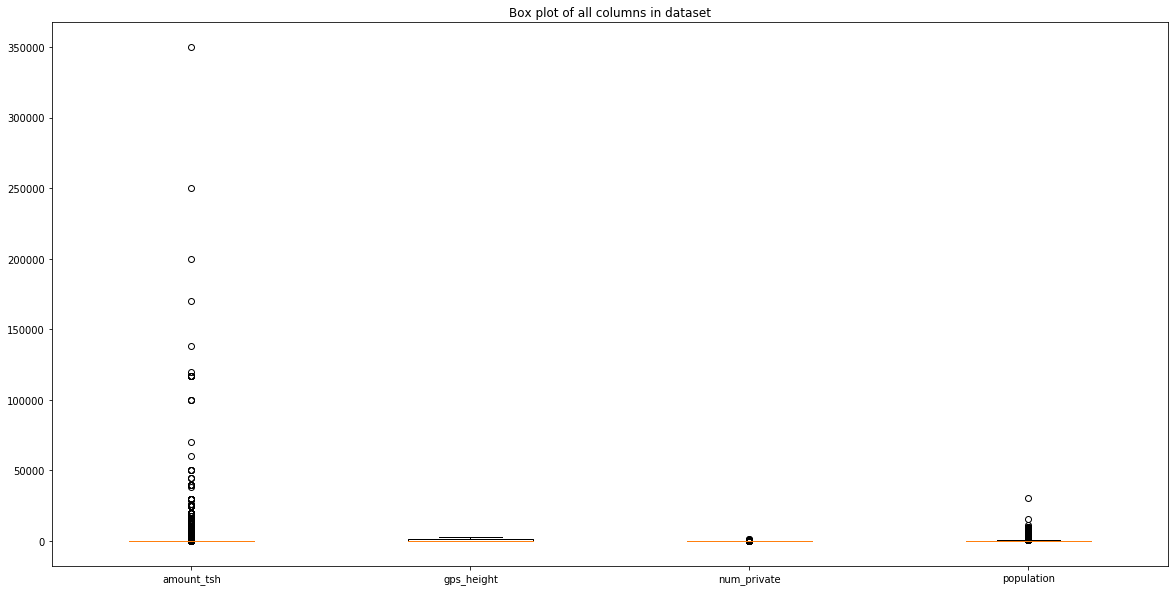

In [28]:
# Listing features with continuous data

cont_col = ['amount_tsh', 'gps_height', 'num_private', 'population']

# Creating boxplots for features with continuous data
plt.figure(figsize=(20, 10))
plt.boxplot([features[col] for col in cont_col])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(1,5), cont_col)
plt.show()

As per the 5-points summaries and boxplots, the features "amount_tsh", "num_private" and "population" have positive outliers. Since these outliers can influence the next data-preprocessing steps and the model, I will replace them with the lower and upper range values of the features.

In [29]:
# Calculating the lower and upper range values

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [30]:
# Replacing the outliers with lower and upper range values

for col in cont_col:
    features[col] = features[col].map(lambda x: upper_range[col] if x > upper_range[col] else x)
    features[col] = features[col].map(lambda x: lower_range[col] if x < lower_range[col] else x)

# Checking if the outliers have been dropped
# Notice 'amount_tsh' no longer has 350000

features.describe()

,amount_tsh,gps_height,num_private,district_code,population,construction_year
count,59400.000000,59400.000000,59400.0,59400.000000,59400.000000,59400.000000
mean,12.748566,668.297239,0.0,5.629747,128.424537,1300.652475
std,20.976109,693.116350,0.0,9.633649,175.514950,951.620547
min,0.000000,-90.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,2.000000,0.000000,0.000000
50%,0.000000,369.000000,0.0,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,0.0,5.000000,215.000000,2004.000000
max,50.000000,2770.000000,0.0,80.000000,537.500000,2013.000000


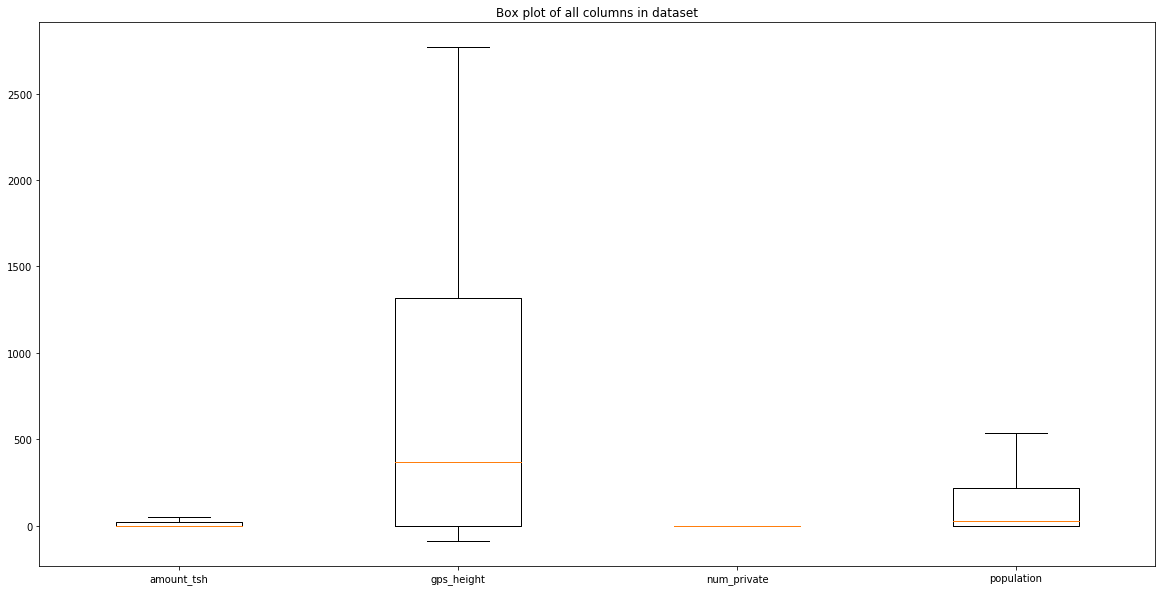

In [31]:
# Checking the boxplots again
plt.figure(figsize=(20, 10))
plt.boxplot([features[col] for col in cont_col])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(1,5), cont_col)
plt.show()

It looks like all the outliers have been replaced.

# Scrubbing Data - Missing and Filler Values

As the next part of data scrubbing, we will check if our remaining features have missing and filler values. 

Let's take a look at the missing values first.

In [32]:
features.isna().sum()

amount_tsh                  0
gps_height                  0
num_private                 0
basin                       0
region                      0
district_code               0
population                  0
public_meeting           3334
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment_type                0
water_quality               0
quantity                    0
source                      0
waterpoint_type_group       0
dtype: int64

Two features, "public_meeting" and "permit", have missing values. Next, we will look at the top most populated values in each feature and see if we can find any filler values.

In [33]:
for col in features.columns:
    print(col, '\n', features[col].value_counts(normalize=True).head(), '\n\n' )

amount_tsh 
 0.0     0.700993
50.0    0.229512
20.0    0.024630
10.0    0.013569
30.0    0.012508
Name: amount_tsh, dtype: float64 


gps_height 
  0     0.344074
-15    0.001010
-16    0.000926
-13    0.000926
-20    0.000875
Name: gps_height, dtype: float64 


num_private 
 0.0    1.0
Name: num_private, dtype: float64 


basin 
 Lake Victoria      0.172525
Pangani            0.150505
Rufiji             0.134276
Internal           0.131061
Lake Tanganyika    0.108283
Name: basin, dtype: float64 


region 
 Iringa         0.089125
Shinyanga      0.083872
Mbeya          0.078098
Kilimanjaro    0.073721
Morogoro       0.067441
Name: region, dtype: float64 


district_code 
 1    0.205438
2    0.188098
3    0.168316
4    0.151498
5    0.073333
Name: district_code, dtype: float64 


population 
 0.0      0.359949
1.0      0.118266
537.5    0.073788
200.0    0.032660
150.0    0.031852
Name: population, dtype: float64 


public_meeting 
 True     0.909838
False    0.090162
Name: public_meeti

The filler values we can find in the above analysis are -
<br>
- population: 0
- construction_year: 0
- payment_type: unknown
- water_quality: unknown
- quantity: unknown

Since the population of missing and filler values are quite large, I will not remove their respective rows since we will suffer from the loss of data that might be value for our model. Also, I will not replace these values with their respective median, mean or mode values since it will reduce the variability of our features. Instead, I will use the KNN Imputer method from scikit-learn. This method replaces the missing values with the mean value from n_neighbors nearest neighbors found in the data.

First, we need to replace the filler values in the above five columns with np.nan so that the KNN Imputer will correctly recognize them.

In [34]:
# Making a list of features with filler values
nan_col = ['population', 'construction_year', 'payment_type', 'water_quality', 'quantity']

# Making a list of filler values
nan_val = [0, 0, 'unknown', 'unknown', 'unknown']

# Using the for loop to replace the filler values with np.nan and printing out the resulting number of missing values
for i in range(len(nan_col)):
    features[nan_col[i]] = features[nan_col[i]].map(lambda x: np.nan if x == nan_val[i] else x)
    print("Missing values in", nan_col[i], ":", features[nan_col[i]].isna().sum())

Missing values in population : 21381
Missing values in construction_year : 20709
Missing values in payment_type : 8157
Missing values in water_quality : 1876
Missing values in quantity : 789


Next, we will create dummies for our categorical features. Since most of the categorical features have text values, the KNN Imputer will generate errors. We will use pandas' get_dummies function for this step.

In [35]:
# Listing categorical features
cat_features = features[['basin', 'region', 'district_code', 'public_meeting', 'permit', 'construction_year', 'extraction_type_class',
                         'management', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type_group']]

In [36]:
# Creating dummies and dropping one variable to avoid dummy variable trap
cat_dummies = pd.get_dummies(cat_features, drop_first=True)
cat_dummies.head()

,district_code,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
id,,,,,,,,,,,,,,,,,,,,,
69572,5,1999.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8776,2,2010.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
34310,4,2009.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
67743,63,1986.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
19728,1,NaN,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [37]:
# Removing the original categorical features from the dataframe
features = features.drop(['basin', 'region', 'district_code', 'public_meeting', 'permit', 'construction_year',
                          'extraction_type_class', 'management', 'payment_type', 'water_quality', 'quantity',
                          'source', 'waterpoint_type_group'], axis=1)

In [38]:
# Adding the dummy categories to the dataframe
features = pd.concat([features, cat_dummies], axis=1)

Now that we have the dummy categories, we can split our data into train and test datasets by using scikit-learn's train_test_split function. 

Spliting the data into train and test datasets at this point is to prevent data leak from the test datasets to next data-scrubing and model creation steps.

In [39]:
# Creating train and test datasets with 0.75/0.25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

Since we are using KNN Imputer, which is a distance based imputation method, we first need to normalize our data. If we skip this step, the features with larger magnitude values will have more weight on the imputation.

We will use scikit-learn's MinMaxScaler to normalize our data.

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [41]:
# Checking the train dataset has been normalized
X_train.describe()

,amount_tsh,gps_height,num_private,population,district_code,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
count,44550.000000,44550.000000,44550.0,28578.000000,44550.000000,29087.000000,44550.000000,44550.000000,44550.000000,44550.000000,...,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,0.254110,0.258068,0.0,0.370836,0.070641,0.694966,0.083973,0.041908,0.108822,0.172009,...,0.038182,0.162088,0.284646,0.284759,0.001167,0.581010,0.000067,0.296117,0.013423,0.107407
std,0.419046,0.244629,0.0,0.341256,0.121129,0.235121,0.277351,0.200381,0.311419,0.377392,...,0.191637,0.368535,0.451251,0.451305,0.034145,0.493399,0.008206,0.456548,0.115079,0.309634
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.022238,0.0,0.072693,0.025000,0.528302,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.152489,0.0,0.277726,0.037500,0.754717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.488175,0.0,0.594595,0.062500,0.905660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Checking the test dataset has been normalized
X_test.describe()

,amount_tsh,gps_height,num_private,population,district_code,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
count,14850.000000,14850.000000,14850.0,9441.000000,14850.000000,9604.000000,14850.000000,14850.000000,14850.000000,14850.000000,...,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.00000,14850.000000,14850.000000,14850.000000,14850.000000
mean,0.257556,0.279717,0.0,0.376044,0.069564,0.693557,0.090505,0.039529,0.106667,0.174074,...,0.040000,0.161010,0.278990,0.291919,0.000943,0.58862,0.000269,0.289293,0.012525,0.107407
std,0.420950,0.255580,0.0,0.343671,0.118270,0.235936,0.286914,0.194855,0.308699,0.379186,...,0.195966,0.367553,0.448518,0.454661,0.030691,0.49210,0.016411,0.453449,0.111217,0.309641
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033174,0.0,0.072693,0.025000,0.509434,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.169923,0.0,0.277726,0.037500,0.754717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.519351,0.0,0.641193,0.062500,0.905660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Our datasets are now normalized. We can move on to KNN Imputation.

In [43]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

X_train = pd.DataFrame(np.round(imputer.fit_transform(X_train)),columns = X_train.columns)
X_test = pd.DataFrame(np.round(imputer.fit_transform(X_test)),columns = X_test.columns)

In [44]:
# Checking if the missing values have been replaced
X_train.isna().sum().sum()

0

In [45]:
# Checking if the missing values have been replaced
X_test.isna().sum().sum()

0

It looks like all the missing values in our features have been filled.

# Exploring Data - Class Imbalance

Our next step is to check if our training dataset has the imbalance class problem. If this problem exists, our models will have low predictive accuracy for the infrequent classes and our models' performance measurements will become unreliable.

To check if this there is a class imbalance, we will see the population percentages of the target variables.

In [46]:
# Checking the normalized value counts of target variable
y_train['status_group'].value_counts(normalize=True)

functional                 0.542334
non functional             0.384871
functional needs repair    0.072795
Name: status_group, dtype: float64

As we can see, the 'functional' label makes up about 54% and 'non functional' makes up about 38% of our training data set. The 'functional needs repair' has a very infrequent population with only about 7%. So, our training dataset definitely has an class imbalance problem.

To fix this problem, we will utilize the Synthetic Minority Oversampling or SMOTE tool from imblearn package.

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train, y_train) 

Let's check if the population of the labels are now balance.

In [48]:
y_train['status_group'].value_counts(normalize=True)

functional needs repair    0.333333
non functional             0.333333
functional                 0.333333
Name: status_group, dtype: float64

Now all the 3 target labels are balanced at 33.33% each.

# Exploring and Constructing Models

In the next part of our project, we will explore different machine learning methods and see which one will give us the best result. The machine learning methods we will explore are -

- K-Nearest Neighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier
- eXtreme Gradient Boosting (XGBoost)
- Support Vector Machines (SVM)

While we are exploring each method, we will also use GridSearchCV to check which hyperparameters give us the best result in the particular method. We will use precision, recall, accuracy and f1 scores to compare between models and sets of hyperparameters.

Before we construct the models, let's create a function that enters testing scores into a dataframe. With this function, we can keep track of our models' performances and compare the scores at the end.

In [49]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Creating an empty dataframe with column names
scores_df = pd.DataFrame(columns = ['Model', 'Precision', 'Recall', 'Accuracy', 'F1'])

# Writing the function
def enter_scores(Model, y_test, y_hat_test):

    # Calling the global dataframe
    global scores_df
    
    # Calculating various test scores
    precision = precision_score(y_test, y_hat_test, average='weighted')
    recall = recall_score(y_test, y_hat_test, average='weighted')
    accuracy = accuracy_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test, average='weighted')
    
    # Entering the calculated scores into the dataframe
    scores_df = scores_df.append({'Model':Model, 'Precision':precision, 'Recall':recall, 'Accuracy':accuracy, 'F1':f1}, ignore_index=True)

### K-Nearest Neighbors Classifier

The first method we will use to construct our classifier is K-Nearest Neighbors method. First, we will create the base model with the default hyperparametes. 

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier()

Next, we will check the confusion matrix of this model.

[[0.75771796 0.11336132 0.12892072]
 [0.41247672 0.44972067 0.13780261]
 [0.24286721 0.08383234 0.67330046]]


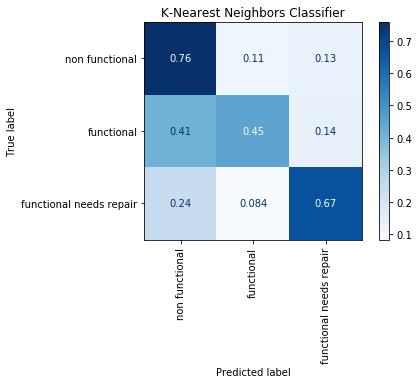

In [51]:
from sklearn.metrics import plot_confusion_matrix

class_names = y_train['status_group'].unique()

disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('K-Nearest Neighbors Classifier')

print(disp.confusion_matrix)

As we can see from the above confusion matrix plot, our model did poorly in predicting the true positives. Among the 3 labels, our model only did a decent job with true positives for 'non functional' labels (75%) but the other two labels are far from decent.

Let's see the scores of this model.

In [52]:
from sklearn.metrics import classification_report

# Predicting target values with the model

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('KNN', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))


Training Data
                         precision    recall  f1-score   support

             functional       0.64      0.83      0.72     24161
functional needs repair       0.85      0.67      0.75     24161
         non functional       0.83      0.76      0.80     24161

               accuracy                           0.75     72483
              macro avg       0.77      0.75      0.76     72483
           weighted avg       0.77      0.75      0.76     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.77      0.76      0.76      8098
functional needs repair       0.26      0.45      0.33      1074
         non functional       0.76      0.67      0.72      5678

               accuracy                           0.70     14850
              macro avg       0.60      0.63      0.60     14850
           weighted avg       0.73      0.70      0.71     14850



With this model, training data scores are higher than the testing data scores. This indicates that our model is overfitted. The scores for the testing dataset is also relatively low (approximately around 70%).

Let's try to use the GridSearchCV function from scikit-learn to see if we can narrow the gap and improve the scores by tuning the hyperparameters. The hyperparameters that we will tune are 'leaf_size' and 'n_neighbors'.

In [53]:
from sklearn.model_selection import GridSearchCV

# Set the grid for the GridSearchCV
grid = [{'leaf_size': [20, 30, 40], 
         'n_neighbors': [5, 7, 9]}]

In [54]:
# # Instantiate GridSearchCV
gridsearch = GridSearchCV(estimator=clf, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [55]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Pring the best hyperparameters
print(f"Optimal Parameters: {gridsearch.best_params_}")

Optimal Parameters: {'leaf_size': 20, 'n_neighbors': 5}


As per the GridSearchCV, the optimal hyperparameters are the same as the base model's hyperparameters.

[[0.75771796 0.11336132 0.12892072]
 [0.41247672 0.44972067 0.13780261]
 [0.24286721 0.08383234 0.67330046]]


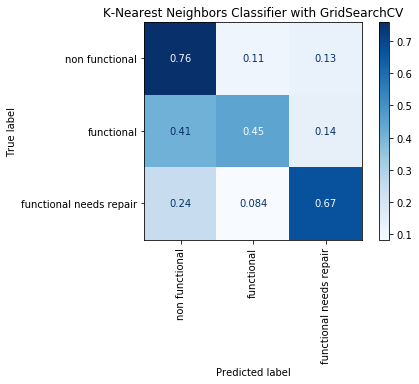

In [56]:
disp = plot_confusion_matrix(gridsearch, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('K-Nearest Neighbors Classifier with GridSearchCV')

print(disp.confusion_matrix)

Because GridSearchCV uses the same hyperparameters as the base model, the confusion matrix is also the same.

In [57]:
# Predicting target values with the model

y_hat_train = gridsearch.predict(X_train)
y_hat_test = gridsearch.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('KNN_GS', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.64      0.83      0.72     24161
functional needs repair       0.85      0.67      0.75     24161
         non functional       0.83      0.76      0.80     24161

               accuracy                           0.75     72483
              macro avg       0.77      0.75      0.76     72483
           weighted avg       0.77      0.75      0.76     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.77      0.76      0.76      8098
functional needs repair       0.26      0.45      0.33      1074
         non functional       0.76      0.67      0.72      5678

               accuracy                           0.70     14850
              macro avg       0.60      0.63      0.60     14850
           weighted avg       0.73      0.70      0.71     14850



Similarly, the resulting scores do not change with the GridSearchCV.

### Decision Tree Classifier

The next methold we will try to use is the Decision Tree Classifier. First, we will construct a base model with the default hyperparameters.

In [58]:
# Train a DT classifier
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(random_state=10)  
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

Now, let's look at the confusion matrix of this base model.

[[0.74722154 0.13472462 0.11805384]
 [0.3566108  0.4972067  0.1461825 ]
 [0.22243748 0.09122931 0.68633322]]


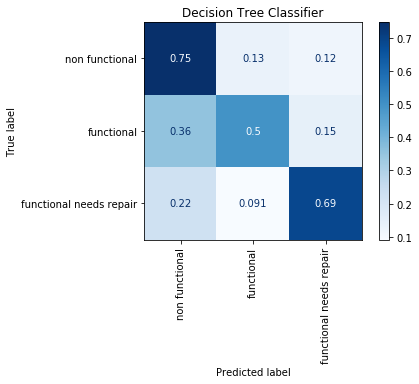

In [59]:
disp = plot_confusion_matrix(dt_clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('Decision Tree Classifier')

print(disp.confusion_matrix)

The DT model has slightly better percentages of true positives for 'non functional' and 'functional' labels than the KNN model. Let's compare the scores next.

In [60]:
# Predicting target values with the model

y_hat_train = dt_clf.predict(X_train)
y_hat_test = dt_clf.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('Decision Tree', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.81      0.83      0.82     24161
functional needs repair       0.84      0.90      0.87     24161
         non functional       0.91      0.82      0.86     24161

               accuracy                           0.85     72483
              macro avg       0.85      0.85      0.85     72483
           weighted avg       0.85      0.85      0.85     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.79      0.75      0.77      8098
functional needs repair       0.25      0.50      0.33      1074
         non functional       0.78      0.69      0.73      5678

               accuracy                           0.71     14850
              macro avg       0.60      0.64      0.61     14850
           weighted avg       0.74      0.71      0.72     14850



The DT classifier has significant improves on the training data scores. However, its testing data scores improves only slightly. Additionally, the gap between training and testing scores become larger which indicates that the DT model has overfitting problem.

Next, let's try to see if we can improve the scores by using the GridSearchCV tool. The hyperparameters we will tune with GridSearchCV are 'criterion', 'max_depth', 'min_samples_split' and 'min_samples_leaf'.

In [61]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [62]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3)
dt_grid_search.fit(X_train, y_train)

print(f"Optimal Parameters: {dt_grid_search.best_params_}")

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10}


As you can see, the hyperparameters selected by GridSearchCV is different from the default hyperparmeters. 

[[0.74413435 0.13707088 0.11879476]
 [0.34729981 0.51955307 0.13314711]
 [0.21609722 0.09492779 0.68897499]]


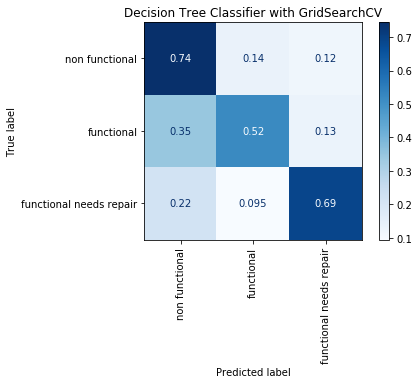

In [63]:
disp = plot_confusion_matrix(dt_grid_search, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('Decision Tree Classifier with GridSearchCV')

print(disp.confusion_matrix)

By using the optimal hyperparameters, the true positive percentage for 'non functional' lable slightly decreases while the percentages for the two other labels slightly increase.

In [64]:
# Predicting target values with the model

y_hat_train = dt_grid_search.predict(X_train)
y_hat_test = dt_grid_search.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('Decision Tree_GS', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.78      0.79      0.78     24161
functional needs repair       0.81      0.88      0.85     24161
         non functional       0.87      0.78      0.82     24161

               accuracy                           0.82     72483
              macro avg       0.82      0.82      0.82     72483
           weighted avg       0.82      0.82      0.82     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.79      0.74      0.77      8098
functional needs repair       0.25      0.52      0.34      1074
         non functional       0.78      0.69      0.73      5678

               accuracy                           0.71     14850
              macro avg       0.61      0.65      0.61     14850
           weighted avg       0.75      0.71      0.72     14850



With the optimal hyperparameters, all the scores of both training and testing datasets decrease.

### Random Forest Classifier

The next method we will use is Random Forest Classifier. Same as before, we will begin with a base model with default hyperparameters.

In [65]:
# Train a RF classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

Now, we will look at the confusion matrix and the scores for this base model.

[[0.75895283 0.12126451 0.11978266]
 [0.34636872 0.4972067  0.15642458]
 [0.20200775 0.07537865 0.7226136 ]]


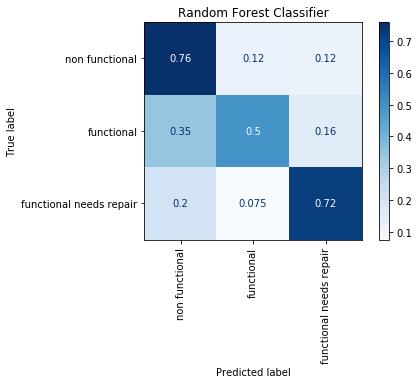

In [66]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('Random Forest Classifier')

print(disp.confusion_matrix)

The true positive percentage of RF for 'non functional' and 'functional needs repair' improve from the DT models but the percentage for 'functional' label decreases.

In [67]:
# Predicting target values with the model

y_hat_train = rf_clf.predict(X_train)
y_hat_test = rf_clf.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('Random Forest', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.82      0.81      0.81     24161
functional needs repair       0.84      0.90      0.87     24161
         non functional       0.89      0.83      0.86     24161

               accuracy                           0.85     72483
              macro avg       0.85      0.85      0.85     72483
           weighted avg       0.85      0.85      0.85     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.80      0.76      0.78      8098
functional needs repair       0.27      0.50      0.35      1074
         non functional       0.78      0.72      0.75      5678

               accuracy                           0.73     14850
              macro avg       0.62      0.66      0.63     14850
           weighted avg       0.76      0.73      0.74     14850



The RF base model has the same training scores as the DT base model but better scores than DT final model. It also has slightly better testing scores than both DT models. 

Let's see if we narrow this gap by using the GridSearchCV. The hyperparameters we will tune with GridSearchCV are 'n_estimators', 'criterion', 'max_depth', 'min_samples_split', and 'min_samples_leaf'.

In [68]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 6]
}

In [69]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


[[0.76327488 0.11583107 0.12089405]
 [0.3556797  0.49162011 0.15270019]
 [0.2005988  0.07502642 0.72437478]]


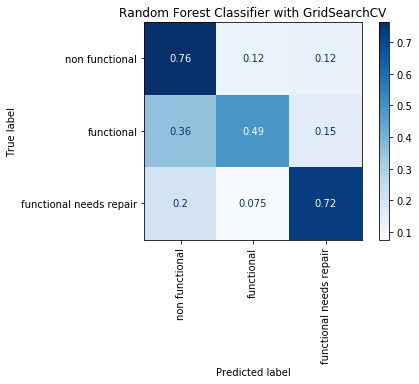

In [70]:
disp = plot_confusion_matrix(rf_grid_search, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('Random Forest Classifier with GridSearchCV')

print(disp.confusion_matrix)

By using the GridSearchCV, we increase the true positive percentage for 'functional' but lower the percentages for 'non functional' and 'functional needs repair' labels. 

In [71]:
# Predicting target values with the model

y_hat_train = rf_grid_search.predict(X_train)
y_hat_test = rf_grid_search.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('Random Forest_GS', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.81      0.81      0.81     24161
functional needs repair       0.83      0.90      0.87     24161
         non functional       0.89      0.82      0.86     24161

               accuracy                           0.84     72483
              macro avg       0.85      0.84      0.84     72483
           weighted avg       0.85      0.84      0.84     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.80      0.76      0.78      8098
functional needs repair       0.28      0.49      0.36      1074
         non functional       0.78      0.72      0.75      5678

               accuracy                           0.73     14850
              macro avg       0.62      0.66      0.63     14850
           weighted avg       0.76      0.73      0.74     14850



With the optimal hyperparameters, all four scores for the training data decrease. However, the precision score for the testing data increases by only 1%. The other 3 scores decrease slightly.

### XGBoost

Now we will move on to the eXtreme Gradient Boosting (XGBoost) method. First, we will start with the default hyperparameters to build the base model.

In [72]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [73]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

[[0.69251667 0.21289207 0.09459126]
 [0.29888268 0.5735568  0.12756052]
 [0.26822825 0.12433956 0.60743219]]


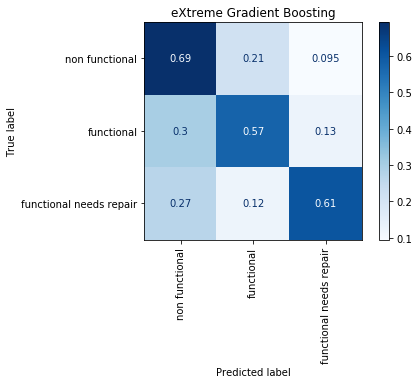

In [74]:
disp = plot_confusion_matrix(xgb_clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('eXtreme Gradient Boosting')

print(disp.confusion_matrix)

The base XGBoost model has higher true positive percentage for 'functional' than the previous models but lower percentages for the two other labels.

In [75]:
# Predicting target values with the model

y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('XGBoost', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.63      0.70      0.67     24161
functional needs repair       0.69      0.75      0.72     24161
         non functional       0.78      0.63      0.70     24161

               accuracy                           0.69     72483
              macro avg       0.70      0.69      0.69     72483
           weighted avg       0.70      0.69      0.69     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.75      0.69      0.72      8098
functional needs repair       0.20      0.57      0.30      1074
         non functional       0.79      0.61      0.69      5678

               accuracy                           0.65     14850
              macro avg       0.58      0.62      0.57     14850
           weighted avg       0.73      0.65      0.68     14850



All the scores for training and testing datasets generated by the XGBoost model is lower than the Random Forest model with optimal hyperparameters. As the next step, we use GridSearchCV to set 'learning_rate', 'max_depth', 'min_child_weight' and 'subsample' as the values shown below and tune the 'n_estimators' by increasing it from 5 to 250.

In [76]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [77]:
grid_xgb = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print(f"Optimal Parameters: {grid_xgb.best_params_}")

Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 250, 'subsample': 0.7}


With the GridSearchCV, the optimal 'n_estimators' is 250.

[[0.75092615 0.15275377 0.09632008]
 [0.31005587 0.56145251 0.12849162]
 [0.23423741 0.09175766 0.67400493]]


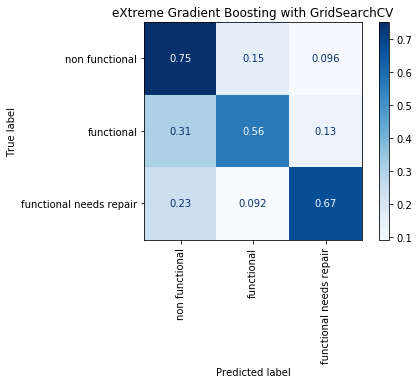

In [78]:
disp = plot_confusion_matrix(grid_xgb, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('eXtreme Gradient Boosting with GridSearchCV')

print(disp.confusion_matrix)

By using the optimal hyperparameters, the true positive percentages for 'non functional' and 'functional needs repair' improves but the percentage for 'functional' decreases slightly. Let's see the scores next.

In [79]:
# Predicting target values with the model

y_hat_train = grid_xgb.predict(X_train)
y_hat_test = grid_xgb.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('XGBoost_GS', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.73      0.77      0.75     24161
functional needs repair       0.78      0.87      0.82     24161
         non functional       0.85      0.72      0.78     24161

               accuracy                           0.79     72483
              macro avg       0.79      0.79      0.79     72483
           weighted avg       0.79      0.79      0.79     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.79      0.75      0.77      8098
functional needs repair       0.26      0.56      0.35      1074
         non functional       0.81      0.67      0.73      5678

               accuracy                           0.71     14850
              macro avg       0.62      0.66      0.62     14850
           weighted avg       0.76      0.71      0.72     14850



By using the GridSearchCV, the scores for both training and testing datasets improved.

### Support Vector Machines (SVM)

The next method we will try is Support Vector Machines (SVM) method. First, we will build the base model with the default hyperparameters.

In [80]:
# Train a SVM classifier

from sklearn import svm

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

[[0.62509262 0.30204989 0.0728575 ]
 [0.23277467 0.68063315 0.08659218]
 [0.25466714 0.18756604 0.55776682]]


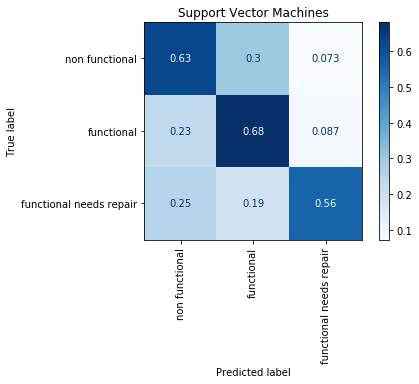

In [81]:
disp = plot_confusion_matrix(svm_clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('Support Vector Machines')

print(disp.confusion_matrix)

So far, the SVM base model gives us the best true positive percentage for 'functional' (68%). However, the percentages for the two other labels dropped.

In [82]:
# Predicting target values with the model

y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

# Entering the testing scores into the dataframe
enter_scores('SVM', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.56      0.64      0.60     24161
functional needs repair       0.59      0.68      0.63     24161
         non functional       0.80      0.57      0.67     24161

               accuracy                           0.63     72483
              macro avg       0.65      0.63      0.63     72483
           weighted avg       0.65      0.63      0.63     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.75      0.63      0.68      8098
functional needs repair       0.17      0.68      0.28      1074
         non functional       0.82      0.56      0.66      5678

               accuracy                           0.60     14850
              macro avg       0.58      0.62      0.54     14850
           weighted avg       0.74      0.60      0.65     14850



The SVM base model has lower scores for both training and testing datasets as compared to both RF models. Let's try the GridSearchCV next.

# Model Selection

Since we have constructed multiple classfication models, we can now compare their performance metrics altogether. In this comparison, we will use the F1 and Accuracy as our primary metrics. Accuracy tells us the total number of predictions a model gets right and F-1 tells us the harmonic mean of Precision and Recall.

Let's print 'scores_df' where we entered our model scores and sort it by F1.

In [83]:
scores_df.sort_values('F1', ascending=False)

,Model,Precision,Recall,Accuracy,F1
5,Random Forest_GS,0.757020,0.728754,0.728754,0.740070
4,Random Forest,0.756453,0.726128,0.726128,0.738189
7,XGBoost_GS,0.755069,0.707811,0.707811,0.724816
3,Decision Tree_GS,0.747335,0.706801,0.706801,0.722288
2,Decision Tree,0.744139,0.705859,0.705859,0.720656
0,KNN,0.730554,0.703165,0.703165,0.713880
1,KNN_GS,0.730554,0.703165,0.703165,0.713880
6,XGBoost,0.728028,0.651380,0.651380,0.677919
8,SVM,0.735454,0.603367,0.603367,0.645695


As we can see, the Random Forest Model with the hyperparameters selected by the GridSearchCV has the highest Accuracy and F1 scores. Let's plot a bar graph so that we can visualize and compare the scores.

Text(0.5, 1.0, 'Metrics Comparison between Classifiers')

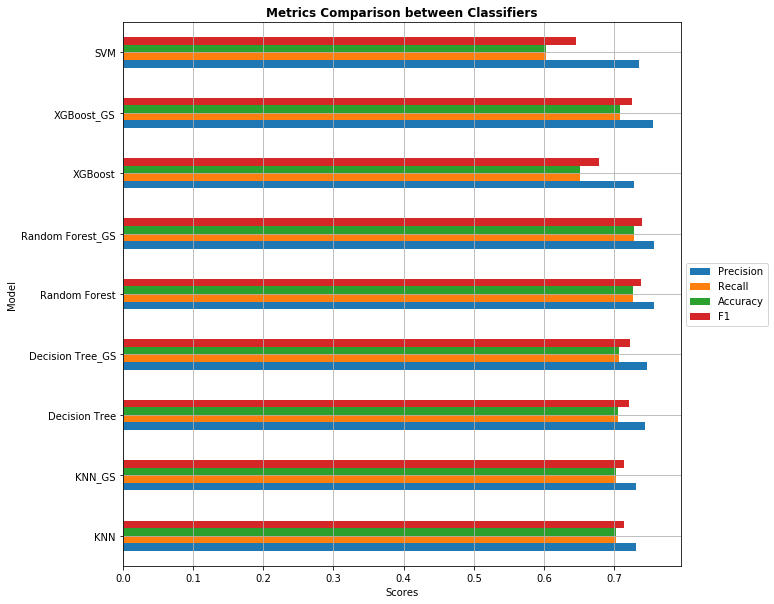

In [84]:
scores_df.plot(x='Model', kind='barh', figsize=(10,10), grid=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Scores')
plt.title('Metrics Comparison between Classifiers',fontweight="bold")

As per the plot, some of the model performaces are fairly close but the Random Forest Classifier with GridSearchCV has the overall highest scores. The Accuracy and F1 scores around 70% is not great but it is signficantly better than 33% of randomly selecting between 3 labels.

Another important point that we have to draw our attention here is the recall score of 'functional needs repair' and 'non functional' labels of each model. The recall score is vital it tells us the proportion of actual positives that was identified correctly by our model. In other words, it tells us our model's ability to accurately predict the percentages of water wells that are either functional but needs repair, or non functional. If our model has good recall scores for these two labels, the Tanzanian Ministry of Water can use it in this water well maintenance efforts. By focusing on the recall, we might be compromising the accuracy scores of these two labels. Accuracy tell us the proportion of positive identifications by our model that is actually correct. However, it is quite okay to compromise accuracy here for better recall scores because it will be more detrimental to have a non-functional or a water well that needs repairs identified as functional. In this case, the people who use this particular water well will be out of clean water. On the other hand, if a functional water well is predicted as non-functional or needs repair, it will just waste some of the maintanence team's time to check if the water well is as predicted. 

The Random Tree Classifier with GridSearchCV has recall scores of 0.5 for 'functional needs repair' and 0.71 for 'non functional'. There are some models such as XGBoost and SVM which have higher recall scores for 'functional needs repair' label but the Random Tree Classifier with GridSearchCV model has the highest recall score for 'non functional'. Therefore, we will select the Random Tree Classifier with GridSearchCV as our model since it has the highest accuracy, f1 and the recall score for 'non functional' label.

# Interpretting the Model

As the next step, we will interpret our Random Forest Classifier by looking at the 5 features with the highest importance. We will find out which features have the highest importance by using 'feature_importances_' attribute of the classifier.

In [85]:
# Create a series with descending feature importance

feature_imp = pd.Series(rf_grid_search.best_estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

quantity_enough                     0.058033
quantity_insufficient               0.046974
population                          0.044102
permit_True                         0.042188
construction_year                   0.039732
                                      ...   
source_unknown                      0.000465
management_other - school           0.000241
water_quality_fluoride abandoned    0.000142
waterpoint_type_group_dam           0.000012
num_private                         0.000000
Length: 81, dtype: float64

Next, we will create two horizontal bar charts - one with all the features and another with just the top 5 features. These plots will help us visualize the importances of the features.

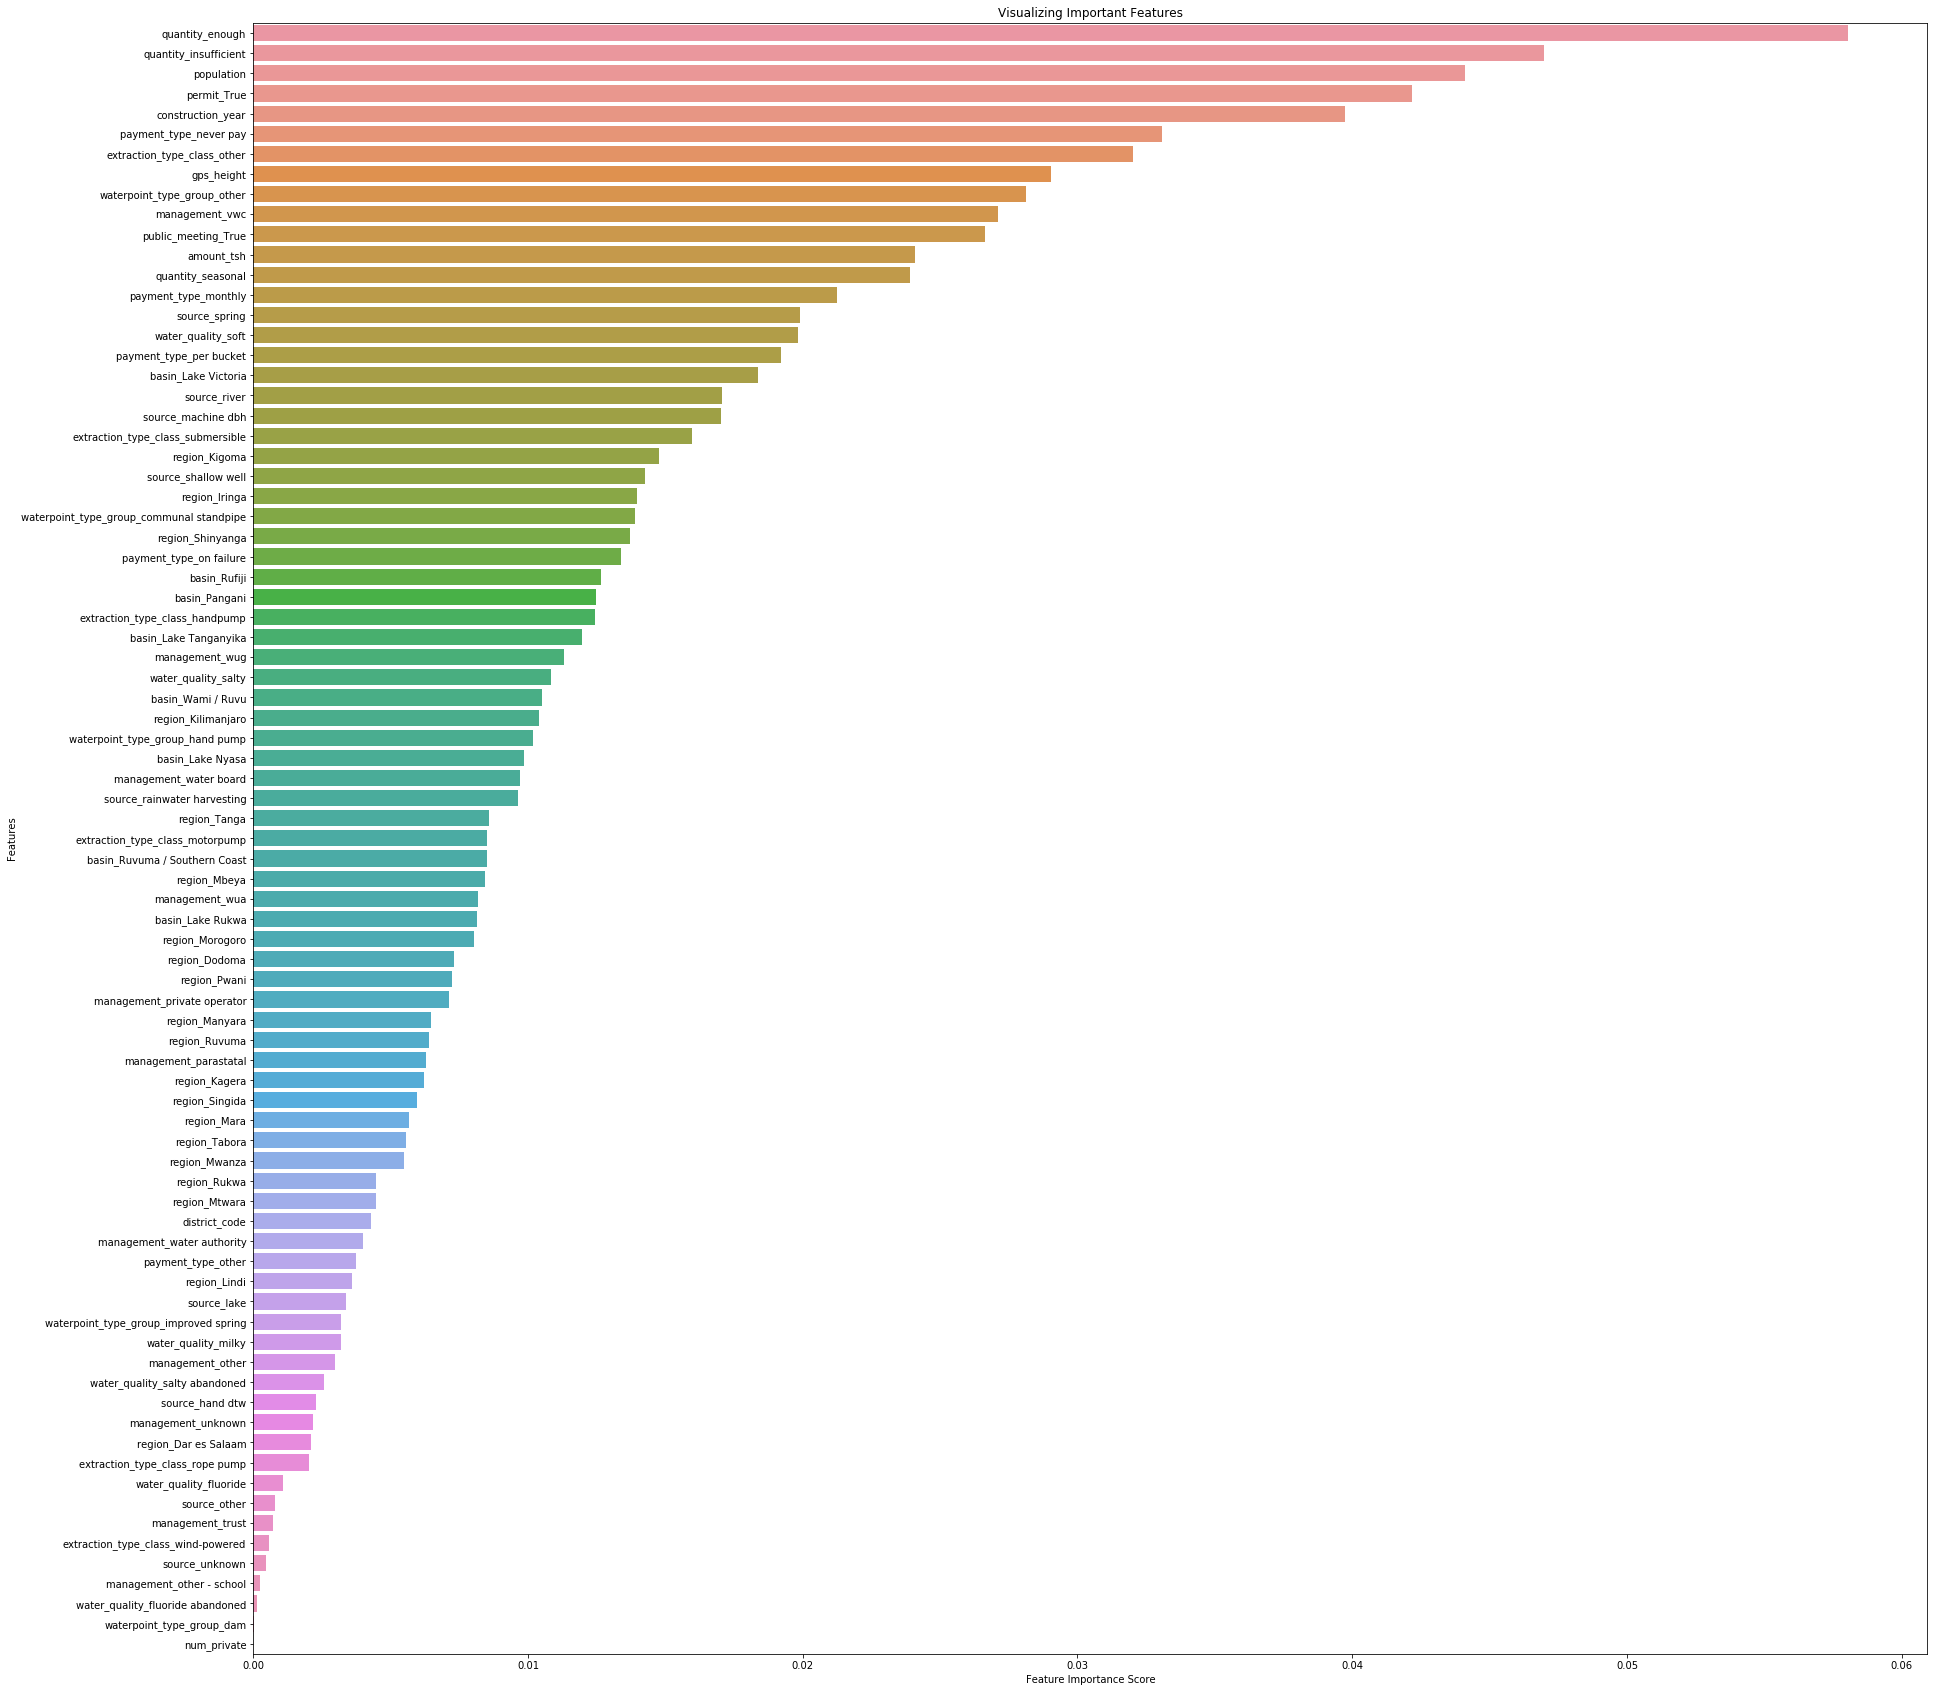

In [86]:
# Creating a bar plot with all the features
plt.figure(figsize=(30,30))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

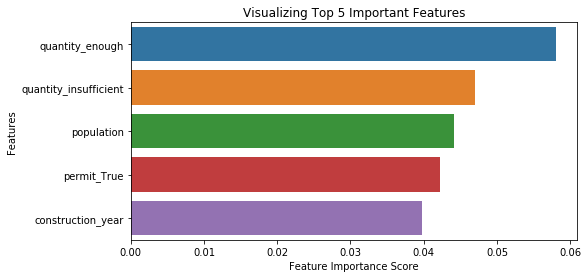

In [87]:
# Creating a series with the top 5 features
top_5 = feature_imp[0:5]

# Creating a bar plot with the top 5 features
plt.figure(figsize=(8,4))
sns.barplot(x=top_5, y=top_5.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 5 Important Features")
plt.show()

As per the chart above, top 5 features with highest importances are 'quantity_enough', 'quantity_insufficient', 'population', 'permit_True' and 'construction_year'. Let's dive into each feature and see if it makes sense in predicting the status of the water well.

- Quantity_enough: This binary feature tells us if the water well has sufficient water quantity. It is logical that this feature is a estimator of the status of the water well.
- Quantity_insufficient: This binary feature tells us if the water well has insufficient water quality. Similar to the above, it is a good estimator of the status of the water well.
- Population: This feature indicates the size of the population that is accessible to the water well. This feature makes sense in a way that if a larger population is using a water well, it will be subject to more wear and tear.
- Permit: This feature tells us if the water well has a permit. A water well with a permit will be more likely to have regular maintanence than one without a permit. Thus, it is a reasonable estimator of the status of the water well.
- Construction Year: This feature shows us the year in which the water well was built. The older water well has a higher chance of being non-functional or in need of repair. So, this also makes sense.

# Reconstructing the Model with Top 5 Features

What if if we use just the top 5 features to re-construct the Random Forest Classifier with its optimal hyperparameters. Can we improve our scores by doing so? Let's see.

In [88]:
# Creating new datasets with top 5 features
X_train2 = X_train.filter(['quantity_enough','quantity_insufficient','population','permit_True','construction_year'], axis=1)
X_test2 = X_test.filter(['quantity_enough','quantity_insufficient','population','permit_True','construction_year'], axis=1)

In [89]:
# Fiting the new datasets with a RF classifier using the optimal hyperparameters
rf_clf2 = RandomForestClassifier(random_state=123, criterion='gini', max_depth=None, min_samples_leaf=1,
                                 min_samples_split=5, n_estimators=100)
rf_clf2.fit(X_train2, y_train)

RandomForestClassifier(min_samples_split=5, random_state=123)

[[0.61126204 0.24611015 0.14262781]
 [0.45065177 0.35009311 0.19925512]
 [0.33233533 0.22032406 0.44734061]]


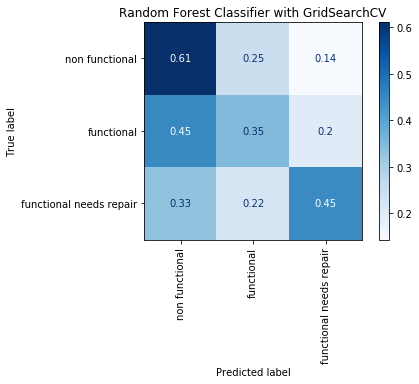

In [90]:
# Plotting the confusion matrix
disp = plot_confusion_matrix(rf_clf2, X_test2, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             xticks_rotation='vertical')
disp.ax_.set_title('Random Forest Classifier with GridSearchCV')

print(disp.confusion_matrix)

In comparison to the classifier that uses the original data, this top 5 features classifier has lower true positive percentages for all 3 labels.

What about the scores?

In [91]:
# Predicting target values with the model

y_hat_train = rf_clf2.predict(X_train2)
y_hat_test = rf_clf2.predict(X_test2)

# Entering the testing scores into the dataframe
enter_scores('Random Forest2_GS', y_test, y_hat_test)

# Printing out the scores
print('Training Data')
print(classification_report(y_train, y_hat_train))
print('\n')
print('Testing Data')
print(classification_report(y_test, y_hat_test))

Training Data
                         precision    recall  f1-score   support

             functional       0.48      0.62      0.54     24161
functional needs repair       0.53      0.51      0.52     24161
         non functional       0.64      0.48      0.55     24161

               accuracy                           0.54     72483
              macro avg       0.55      0.54      0.54     72483
           weighted avg       0.55      0.54      0.54     72483



Testing Data
                         precision    recall  f1-score   support

             functional       0.68      0.61      0.64      8098
functional needs repair       0.10      0.35      0.16      1074
         non functional       0.65      0.45      0.53      5678

               accuracy                           0.53     14850
              macro avg       0.48      0.47      0.44     14850
           weighted avg       0.62      0.53      0.56     14850



The scores for both training and testing datasets also decreased. This proves that other features, although they may not be in the top 5, are still vital for our model. Therefore, we will stick to original to train our model.

# Reconstructing the Model with the Entire Training Dataset

As you might recall, there were originally two datasets - training and testing. The former has both estimator and target variables but the latter only has the estimator variables. Therefore, we couldn't use the testing dataset to calculate our models' performance metrics. So, we split the training dataset into a training and a testing dataset.

Now, we know which model performs the best. What if we use the entire original training dataset to re-fit this model? Maybe, we can improve its performance metrics.

Please note that our 'X_train' and 'X_test' datasets have been scrubbed for missing, filler and outlier values. Our next step is to check if 'X_test' and 'y_test' have the class imbalance problem.

In [92]:
# Checking if there is a class imbalance problem
y_test['status_group'].value_counts(normalize=True)

functional                 0.545320
non functional             0.382357
functional needs repair    0.072323
Name: status_group, dtype: float64

As we can see, the 'X_test' and 'y_test' datasets have the imbalanced classes. We will use SMOTE to fix this problem.

In [93]:
smote = SMOTE()
X_test, y_test= smote.fit_resample(X_test, y_test)

y_test['status_group'].value_counts(normalize=True)

non functional             0.333333
functional                 0.333333
functional needs repair    0.333333
Name: status_group, dtype: float64

Great! The class imbalance problem is now fixed. As the next step, we will combine 'X_train' and 'X_test', and 'y_train' and 'y_test' to re-create the original training dataset.

In [94]:
X_2 = pd.concat([X_train, X_test])
y_2 = pd.concat([y_train, y_test])

Next, we can use this combine datasets to refit our Random Forest Classifier with its optimal hyperparameters. This will be our final model.

In [95]:
# Fiting the RF classifier with the entire training dataset
rf_clf3 = RandomForestClassifier(random_state=123, criterion='gini', max_depth=None, min_samples_leaf=1,
                                 min_samples_split=5, n_estimators=100)
rf_clf3.fit(X_2, y_2)

RandomForestClassifier(min_samples_split=5, random_state=123)

# Predictions

Now that we have our final model, we can move on to generate predictions based on the actual test dataset provided by the source. But first, we have to clean up this dataset as we did with our training dataset.

In [96]:
# Creating a dataframe of the original test values
test_values = pd.read_csv('TestSetValues.csv', index_col='id')

In [97]:
# Dropping the irrelevant and duplicated features
test_values = test_values.drop(columns=['scheme_management', 'scheme_name', 'management_group', 'extraction_type', 
                                        'extraction_type_group', 'payment', 'quality_group', 'quantity_group', 'source_type', 
                                        'source_class', 'waterpoint_type', 'installer', 'longitude', 'latitude', 'subvillage', 
                                        'lga', 'ward', 'region_code', 'date_recorded', 'funder', 'wpt_name', 'recorded_by'],
                                         axis=1)

# checking the remaining number of columns
len(test_values.columns)

17

In [98]:
# Calculating the lower and upper range values

Q1 = test_values.quantile(0.25)
Q3 = test_values.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

# Replacing the outliers with lower and upper range values

for col in cont_col:
    test_values[col] = test_values[col].map(lambda x: upper_range[col] if x > upper_range[col] else x)
    test_values[col] = test_values[col].map(lambda x: lower_range[col] if x < lower_range[col] else x)

# Checking if the outliers have been dropped

test_values.describe()

,amount_tsh,gps_height,num_private,district_code,population,construction_year
count,14850.000000,14850.000000,14850.0,14850.000000,14850.000000,14850.000000
mean,15.189609,655.147609,0.0,5.626397,129.081751,1289.708350
std,25.353870,691.261185,0.0,9.673842,178.869536,955.241087
min,0.000000,-57.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,2.000000,0.000000,0.000000
50%,0.000000,344.000000,0.0,3.000000,20.000000,1986.000000
75%,25.000000,1308.000000,0.0,5.000000,220.000000,2004.000000
max,62.500000,2777.000000,0.0,80.000000,550.000000,2013.000000


In [99]:
# Checking missing values
test_values.isna().sum()

amount_tsh                 0
gps_height                 0
num_private                0
basin                      0
region                     0
district_code              0
population                 0
public_meeting           821
permit                   737
construction_year          0
extraction_type_class      0
management                 0
payment_type               0
water_quality              0
quantity                   0
source                     0
waterpoint_type_group      0
dtype: int64

In [100]:
# Checking filler/placeholder values
for col in test_values.columns:
    print(col, '\n', test_values[col].value_counts(normalize=True).head(), '\n\n' )

amount_tsh 
 0.0     0.701010
62.5    0.188956
50.0    0.042492
20.0    0.023502
10.0    0.012727
Name: amount_tsh, dtype: float64 


gps_height 
  0       0.350909
-19      0.001212
 1294    0.001212
 1343    0.001212
 1283    0.001145
Name: gps_height, dtype: float64 


num_private 
 0.0    1.0
Name: num_private, dtype: float64 


basin 
 Lake Victoria      0.176633
Pangani            0.148350
Rufiji             0.135421
Internal           0.125051
Lake Tanganyika    0.109091
Name: basin, dtype: float64 


region 
 Shinyanga      0.088283
Iringa         0.087879
Mbeya          0.075354
Kilimanjaro    0.075084
Morogoro       0.069495
Name: region, dtype: float64 


district_code 
 1    0.208485
2    0.185589
3    0.169899
4    0.151785
5    0.072189
Name: district_code, dtype: float64 


population 
 0.0      0.367205
1.0      0.118316
550.0    0.073266
150.0    0.029360
200.0    0.028956
Name: population, dtype: float64 


public_meeting 
 True     0.907976
False    0.092024
Name: pu

In [101]:
# Making a list of features with filler values
nan_col = ['population', 'construction_year', 'payment_type', 'water_quality', 'quantity']

# Making a list of filler values
nan_val = [0, 0, 'unknown', 'unknown', 'unknown']

# Using the for loop to replace the filler values with np.nan and printing out the resulting number of missing values
for i in range(len(nan_col)):
    test_values[nan_col[i]] = test_values[nan_col[i]].map(lambda x: np.nan if x == nan_val[i] else x)
    print("Missing values in", nan_col[i], ":", test_values[nan_col[i]].isna().sum())

Missing values in population : 5453
Missing values in construction_year : 5260
Missing values in payment_type : 1992
Missing values in water_quality : 469
Missing values in quantity : 186


In [102]:
# Listing categorical features
cat_features2 = test_values[['basin', 'region', 'district_code', 'public_meeting', 'permit', 'construction_year', 'extraction_type_class',
                         'management', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type_group']]

# Creating dummies and dropping one variable to avoid dummy variable trap
cat_dummies = pd.get_dummies(cat_features2, drop_first=True)
cat_dummies.head()

,district_code,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
id,,,,,,,,,,,,,,,,,,,,,
50785,3,2012.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
51630,2,2000.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17168,2,2010.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
45559,43,1987.0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
49871,3,2000.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [103]:
# Removing the original categorical features from the dataframe
test_values = test_values.drop(['basin', 'region', 'district_code', 'public_meeting', 'permit', 'construction_year',
                          'extraction_type_class', 'management', 'payment_type', 'water_quality', 'quantity',
                          'source', 'waterpoint_type_group'], axis=1)

In [104]:
# Adding the dummy categories to the dataframe
test_values = pd.concat([test_values, cat_dummies], axis=1)

In [105]:
# Min-Max Normalizing
test_values = pd.DataFrame(scaler.fit_transform(test_values), columns = test_values.columns)

In [106]:
# KNN Imputation for missing values
test_values = pd.DataFrame(np.round(imputer.fit_transform(test_values)),columns = test_values.columns)

In [107]:
# Checking if the missing values have been replaced
test_values.isna().sum().sum()

0

Now, we have taken care of all the missing, filler and outlier values in the test dataset. We also normalized it with the min-max scaler.

Next, we will bring the submission file to enter the predictions.

In [108]:
test_labels = pd.read_csv('SubmissionFormat.csv', index_col='id')

In [109]:
# Predicting the target labels by using our final RF model
test_labels['status_group'] = rf_clf3.predict(test_values)

Let's see the predictions have been populated.

In [110]:
test_labels.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional


Great! Now, we can export this dataframe as a csv file for the submission.

In [111]:
test_labels.to_csv('SubmissionFormat_Complete.csv', index=True)

# Areas for Improvements

The areas that I need to work on further in order to improve my final model are as below - 

1. The range of hyperparameters input that I use in GridSearchCV for various model is quite limited due to the computing power of my desktop. For example, I couldn't successfuly use GridSearchCV for SVM because It took a very long time to complete. I think my model performance will be better if I can use a larger range of input in order to find the optimal hyperparameters.
<br>


2. I removed multiple features prior to the model constructions because I believe these features are irrelevant. Some of these features might be relevant and could help in improving my model's performance metrics.
<br>

3. As part of the data scrubbing, I used min-max scaler to normalize my datasets. Possibly, my model's performance metrics might improve if I use other methods such as standardization instead of min-max scaler.